<!-- #region -->
# GSFC Electron Beam Flux and Energy Calculation

Let the nominal background noise on the detector be $N_{BG} = 20$ counts/s-det (to be refined with control data taken inside GSFC vacuum chamber), and the maximum detector count rate is $C_{max}$.

The Redlen M1770 CZT photon energy range is 50 - 300 keV. We will assume that electrons are less efficient at energy deposition than photons, such that we're interested in looking at electron final energies of 50 - 500 keV.

We would like a minimum number of electrons/bin to be approximately 10x as high as the background for sufficient statistics in each energy bin. This is the low end constraint. The upper end constraint is the maximum AXIS detector count rate, $C_{max}$.

The minimum intensity the REF electron generator can achieve is

$$I_{min} = 10^{-9} ~mA/cm^2 = 6 \times 10^6 ~e^-/s/cm^2$$

over the energy ranges of 35 keV - 1.7 MeV. The beam is simulated passing through the shielding and depositing in the Redlen detectors in GEANT4. The simulated shielding electron flux attenuation response to a monoenergetic beam is  
   
$$\frac{I}{I_0} = m ~E + b$$

$$m = 8\times10^{-4}~keV^{-1} ~~,~~ b = -0.725$$


where $E$ is the electron beam energy in units of keV. Typical $I/I_0$ values are $8.9\times10^{-4} - 7.0\times10^{-3}$ for energies of 1000 - 1700 keV. We aim to receive data in the following window:

$$Range = [10 \cdot N_{BG}~,~ C_{max}] \approx [200, 80000]~cps$$

<!-- #endregion -->

<img src="./GSFC_setup1.png" width="400" />
<img src="./GSFC_setup2.png" width="300" /> 
<img src="./GSFC_setup3.png" width="300" />

In [1]:
# %matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
from scipy.special import gamma

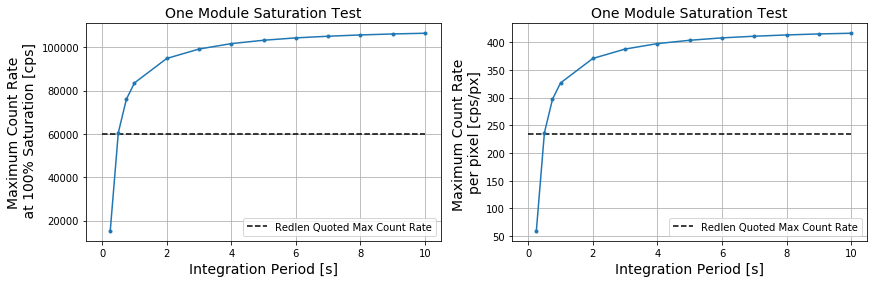

In [2]:
# Connor's testing results for the average maximum count rate for one detector, 
# using 4 sources directly on the detector
intPeriod  = [0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]; # [seconds]
avgCntRate = [15200,60550,76000,83550,94850, 99192,101706,103250,104354,105114,105713,106167,106495]; # [cps]
plt.figure(figsize=(14,4)); plt.subplot(1,2,1); plt.grid(); plt.plot(intPeriod, avgCntRate, '.-');
plt.xlabel('Integration Period [s]', fontsize=14); plt.title("One Module Saturation Test",fontsize=14);
plt.ylabel('Maximum Count Rate\n at 100% Saturation [cps]', fontsize=14);
plt.hlines(xmin=0, xmax=10, y=60000, linestyle='--', label='Redlen Quoted Max Count Rate'); plt.legend();
plt.subplot(1,2,2); plt.grid(); 
plt.plot(intPeriod, np.divide(avgCntRate, 256), '.-');
plt.hlines(xmin=0, xmax=10, y=60000/256, linestyle='--', label='Redlen Quoted Max Count Rate'); plt.legend();
plt.xlabel('Integration Period [s]', fontsize=14); plt.title("One Module Saturation Test",fontsize=14);
plt.ylabel('Maximum Count Rate \nper pixel [cps/px]', fontsize=14);

In [3]:
def readInFrames2Dictionary(extension, test, Erange):
    filepath = "../data/resultsFile_GSFCtest_"
    frame_dict = {};
    
    if test is 1:
        for ene in Erange:
            frame_dict[str(ene)] = pd.read_csv(filepath + str(ene) + "keV_" + str(extension) + ".csv", 
                                   names=['E','det','i','j','x0','y0','z0'])            
    if test is 2:
        for ene in range(200, 500+50, 50):
            frame_dict[str(ene)] = pd.read_csv(filepath + str(ene) + "keV_" + str(extension) + ".csv", 
                                     names=['E','det','i','j','x0','y0','z0']);
    if test is 3:
        try:
            for ene in range(200, 900+100, 100):
                frame_dict[str(ene)] = pd.read_csv(filepath + "lowerEnergy_"+str(ene)+"keV.csv",
                                         names=['E','det','i','j','x0','y0','z0']);
        except:
            for ene in range(300, 900+100, 100):
                frame_dict[str(ene)] = pd.read_csv(filepath + "lowerEnergy_"+str(ene)+"keV.csv",
                                         names=['E','det','i','j','x0','y0','z0']);
            
            frame_dict["200"] = pd.read_csv(filepath + "lowerEnergy_1e8_200keV.csv",
                                     names=['E','det','i','j','x0','y0','z0'])
            frame_dict["300"] = frame_dict["300"].append(pd.read_csv(filepath + "lowerEnergy_1e8_300keV.csv",
                                     names=['E','det','i','j','x0','y0','z0']));
            frame_dict["400"] = frame_dict["400"].append(pd.read_csv(filepath + "lowerEnergy_1e8_400keV.csv",
                                     names=['E','det','i','j','x0','y0','z0']));
            frame_dict["500"] = frame_dict["500"].append(pd.read_csv(filepath + "lowerEnergy_1e8_500keV.csv",
                                     names=['E','det','i','j','x0','y0','z0']));
            frame_dict["600"] = frame_dict["600"].append(pd.read_csv(filepath + "lowerEnergy_1e8_600keV.csv",
                                     names=['E','det','i','j','x0','y0','z0']));
            frame_dict["700"] = frame_dict["700"].append(pd.read_csv(filepath + "lowerEnergy_1e8_700keV.csv",
                                     names=['E','det','i','j','x0','y0','z0']));
            frame_dict["800"] = frame_dict["800"].append(pd.read_csv(filepath + "lowerEnergy_1e8_800keV.csv",
                                     names=['E','det','i','j','x0','y0','z0']));
            frame_dict["900"] = frame_dict["900"].append(pd.read_csv(filepath + "lowerEnergy_1e8_900keV.csv",
                                     names=['E','det','i','j','x0','y0','z0']));
    
    if test is 4:
        for ene in range(800, 1600+100, 100):
            frame_dict[str(ene)] = pd.read_csv(filepath + str(extension) + "_1e8_"+str(ene)+"keV.csv", 
                                     names=['E','det','i','j','x0','y0','z0','p']);
    if test is 5:
        for ene in Erange:
            frame_dict[str(ene)] = pd.read_csv("../data/" + extension % str(ene),
                                               names=['E','det','i','j','x0','y0','z0','p']);

    
    return frame_dict;

            

def fit_fnc1(x, *p):
    a,b = p
    return a * np.exp(-x / b)
def fit_fnc2(x, *p):
    a,b, = p
    return a * np.log(x / b)
def fit_fnc3(x, *p):
    a,b,c = p
    return 1/(b**a) * (x+c)**(a-1) * np.exp(-(x+c)/b)
def fit_fnc4(x, *p):
    a,b = p
    return a * x + b
def fit_fnc5(x, *p):
    a,b,c = p
    return a*x + b*np.log(x) + c
    
def plotTestSpectra(frame, bins, nSimParts, plotOn):
    
    penetratingFraction = [];
    plt.figure(figsize=(14,3)); plt.subplot(1,2,1); plt.grid();
    totalCounts = 0;
    for name in frame.keys():
        if plotOn is True:
            #plt.figure(figsize=(14,3)); plt.subplot(1,2,1); plt.grid();
            plt.subplot(1,2,1); plt.grid(True);
            h = plt.hist(frame[name].E, bins=50, alpha=0.5, label=['E$_0$=%s keV' % name]);
            plt.xlabel("Energy [keV]"); plt.ylabel("Counts");
            plt.title("All energies");
            #plt.legend();
            
            y = h[0]
            x = h[1][0:-1] + np.diff(h[1])/2
            
            popt,pcov = curve_fit(fit_fnc1, x, y, p0=(100, 100));
            plt.plot(x, fit_fnc1(x, *popt), 'r--')
            
            plt.subplot(1,2,2); plt.grid(True);
            h = plt.hist(frame[name].E, bins=bins, alpha=0.5);
            plt.title("AXIS Bins");
            plt.xlabel("Energy [keV]"); plt.ylabel("Counts");
            
            y = h[0][1:-1]
            x = h[1][2:-1] + np.diff(h[1][1:-1])/2
            
            try:
                popt2,pcov2 = curve_fit(fit_fnc2, x, y, p0=(1000,10))
            except:
                popt2 = [1 ,1];
                print("No log fit convergence on %s (oh well)" % name)
                
            plt.plot(x, fit_fnc2(x, *popt2), 'r--');
            
            totalCounts += len(frame[name]);

        penetratingFraction.append(len(frame[name])/nSimParts);

        print("E0 = %s keV %.3f%% penetrating fraction, E0fit = %.2f keV, total counts = %.2e" 
              % (name, 100*len(frame[name])/nSimParts, popt[1], totalCounts))
        

    print();
    return penetratingFraction;

GSFC_data_2mm  = readInFrames2Dictionary("LR2", 1, range(1000, 1700+100, 100)); # 2 mm aluminum
#GSFC_data_LR   = readInFrames2Dictionary("LR", 1, range(1000, 1700+100, 100));  # no aluminum, long run simulation
#GSFC_data_1mm  = readInFrames2Dictionary("1mm", 1, range(1000, 1700+100, 100)); # 1 mm aluminum
#GSFC_data_test2= readInFrames2Dictionary("test2", 1, range(1000, 1700+100, 100));
#GSFC_data_test2_2= readInFrames2Dictionary("test2", 2, range(200, 500+50, 50));
#GSFC_data_lowerE = readInFrames2Dictionary("", 3);
#GSFC_data_blanca = readInFrames2Dictionary("newTests", 4, range(800, 1600+100, 100));
nSimulation    = 1e6;  # typical simulation
nSimulation_LR = 1e8;  # long run simulation
nSimulation_LE = 1.01e8;  # lower energy simulation

#GSFC_data_blanca['1100'].head()

In [4]:
GSFC_data_blanca = readInFrames2Dictionary("newTests", 4, range(800, 1600+100, 100));
GSFC_data_blanca1mmAl = readInFrames2Dictionary("resultsFile_GSFCtest_newTests_1mmAl_1e8_%skeV.csv", 5, 
                                                range(800, 1600+100, 100));

Lower counts: no Al
Lower counts: no Al
Lower counts: no Al
Lower counts: no Al
Lower counts: no Al
Lower counts: no Al
Lower counts: no Al
Lower counts: no Al
Lower counts: no Al


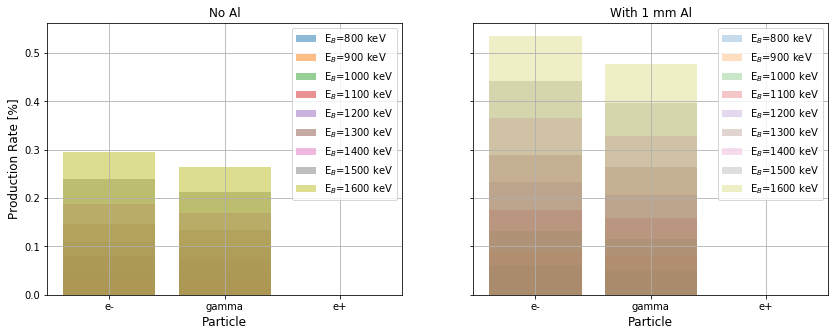

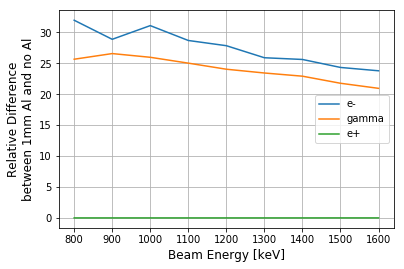

In [5]:
f, [ax1, ax2] = plt.subplots(1,2, figsize=(14,5), sharey=True);
diff   = [];
Earray = [];
for name in GSFC_data_blanca.keys():
    x1 = ['e-','gamma']
    if len(np.unique(GSFC_data_blanca[name].p)) > 2:
        x1 = ['e-','gamma','e+'] # adds in the positrons
    h1 = GSFC_data_blanca[name].p.value_counts()*100/nSimulation_LR
    ax1.bar(x=x1, height=h1, alpha=0.5, label="E$_{B}$=%s keV"%name);
    
    if name in GSFC_data_blanca1mmAl.keys():
        
        x2 = ['e-','gamma']
        if len(np.unique(GSFC_data_blanca1mmAl[name].p)) > 2:
            x2 = ['e-','gamma','e+'] # adds in the positrons
        h2 = GSFC_data_blanca1mmAl[name].p.value_counts()*100/nSimulation_LR
        ax2.bar(x=x2, height=h2, alpha=0.25, label="E$_{B}$=%s keV"%name);
        
        tmp = 100*(h2 - h1)/max(np.sum(h1),np.sum(h2))
        if np.sum(h1) < np.sum(h2):
            print("Lower counts: no Al")
        else:
            print("Lower counts: Al")
        
        if len(x1) is 3:
            diff.append([tmp['e-'], tmp['gamma'], tmp['e+']])
        else:
            diff.append([tmp['e-'], tmp['gamma'], 0])
            
        Earray.append(int(name))
    
ax1.legend(); ax1.grid();
ax1.set_ylabel('Production Rate [%]', fontsize=12);
ax1.set_xlabel('Particle', fontsize=12)
ax1.set_yscale('linear');
ax1.set_title('No Al');

ax2.legend(); ax2.grid();
ax2.set_xlabel('Particle', fontsize=12)
ax2.set_yscale('linear');
ax2.set_title('With 1 mm Al');

plt.figure(); plt.grid();
plt.plot(Earray, diff);
plt.xlabel('Beam Energy [keV]', fontsize=12);
plt.ylabel('Relative Difference\nbetween 1mm Al and no Al', fontsize=12);
plt.legend(x2); 

/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in log


No log fit convergence on 800 (oh well)
E0 = 800 keV 0.048% penetrating fraction, E0fit = 329.61 keV, total counts = 4.82e+04
No log fit convergence on 900 (oh well)
E0 = 900 keV 0.075% penetrating fraction, E0fit = 329.75 keV, total counts = 1.24e+05
No log fit convergence on 1000 (oh well)
E0 = 1000 keV 0.107% penetrating fraction, E0fit = 353.43 keV, total counts = 2.30e+05
No log fit convergence on 1100 (oh well)
E0 = 1100 keV 0.155% penetrating fraction, E0fit = 351.40 keV, total counts = 3.85e+05
No log fit convergence on 1200 (oh well)
E0 = 1200 keV 0.212% penetrating fraction, E0fit = 364.27 keV, total counts = 5.97e+05
No log fit convergence on 1300 (oh well)
E0 = 1300 keV 0.281% penetrating fraction, E0fit = 367.99 keV, total counts = 8.78e+05
No log fit convergence on 1400 (oh well)
E0 = 1400 keV 0.358% penetrating fraction, E0fit = 376.30 keV, total counts = 1.24e+06
No log fit convergence on 1500 (oh well)
E0 = 1500 keV 0.452% penetrating fraction, E0fit = 386.37 keV, tota

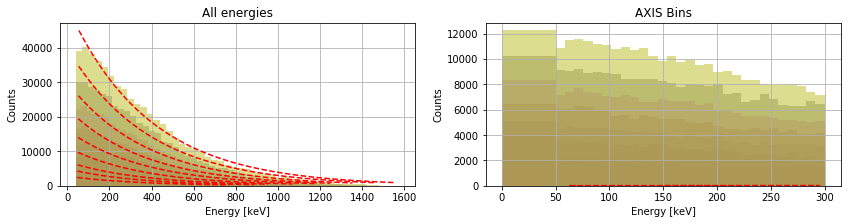

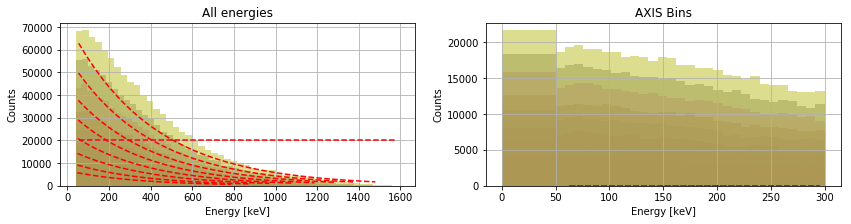

In [6]:
#bins = np.logspace(np.log10(50), np.log10(500), 20);
bins = np.linspace(50, 300, 30);
bins = np.insert(bins, 0, 0);            # underflow
#bins = np.insert(bins, len(bins), 1500); # overflow

penFrac_blanca = plotTestSpectra(GSFC_data_blanca, bins, 1e8, True);
penFrac_blanca1mm = plotTestSpectra(GSFC_data_blanca1mmAl, bins, 1e8, True);

/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in power


E_beam = 800 keV , E0_fit = 154.57 kev, 162.20 keV
m=-0.10, d=84.95 -- m=-0.04, d=35.47
E_beam = 900 keV , E0_fit = 156.79 kev, 162.20 keV
m=-0.18, d=140.46 -- m=-0.07, d=60.60
E_beam = 1000 keV , E0_fit = 166.61 kev, 174.60 keV
m=-0.25, d=217.94 -- m=-0.09, d=89.71
E_beam = 1100 keV , E0_fit = 167.88 kev, 176.66 keV
m=-0.42, d=329.12 -- m=-0.15, d=132.61
E_beam = 1200 keV , E0_fit = 178.40 kev, 181.75 keV
m=-0.54, d=440.17 -- m=-0.17, d=185.48
E_beam = 1300 keV , E0_fit = 179.43 kev, 188.09 keV
m=-0.67, d=565.00 -- m=-0.34, d=291.85
E_beam = 1400 keV , E0_fit = 186.74 kev, 192.25 keV
m=-0.89, d=752.88 -- m=-0.51, d=413.75
E_beam = 1500 keV , E0_fit = 193.56 kev, 196.69 keV
m=-1.25, d=1002.37 -- m=-0.59, d=532.20
E_beam = 1600 keV , E0_fit = 191.57 kev, 205.47 keV
m=-1.38, d=1206.61 -- m=-0.93, d=723.81


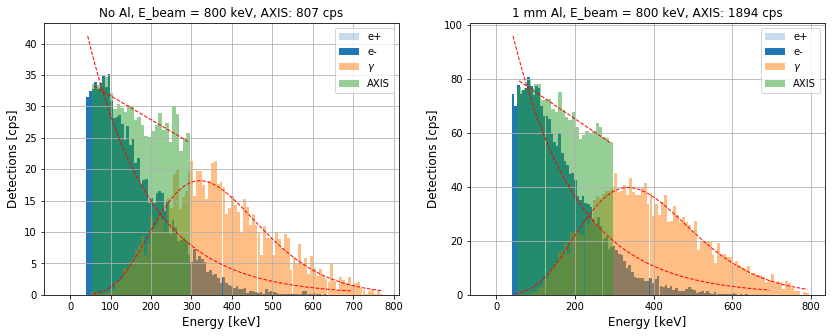

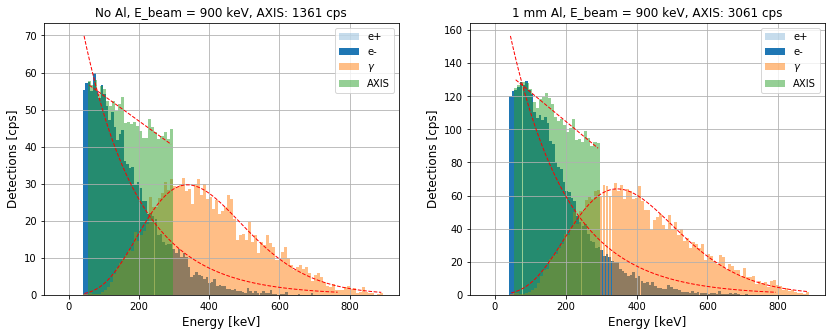

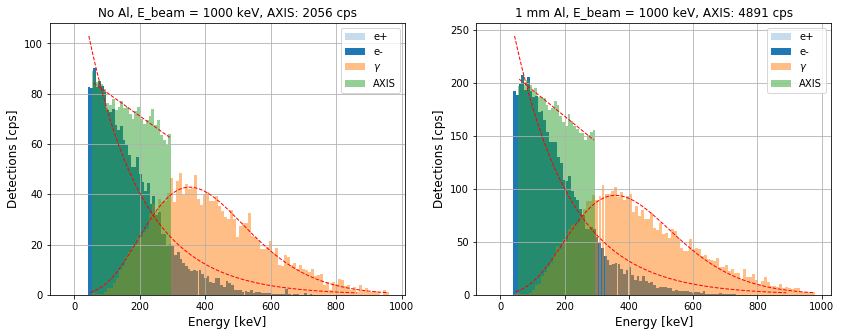

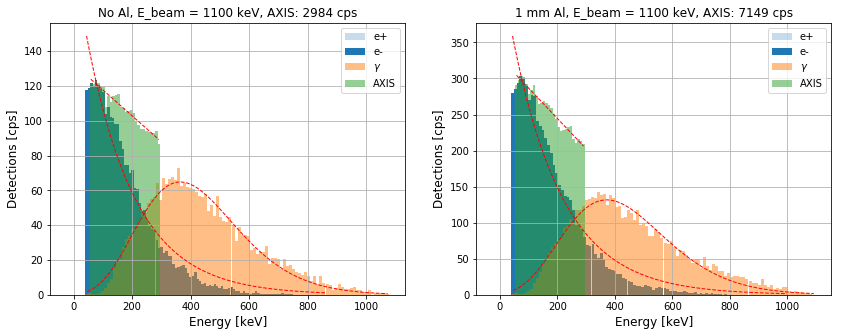

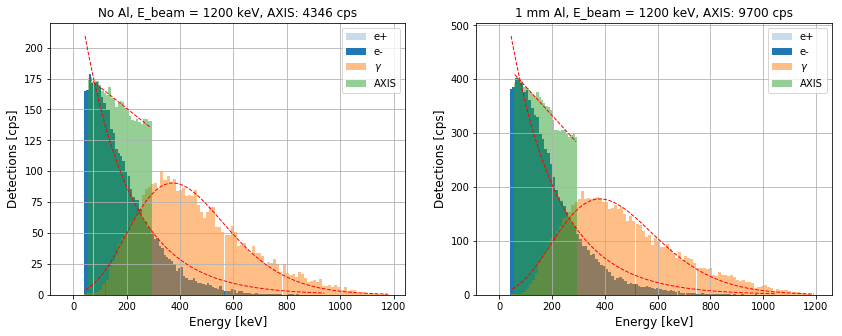

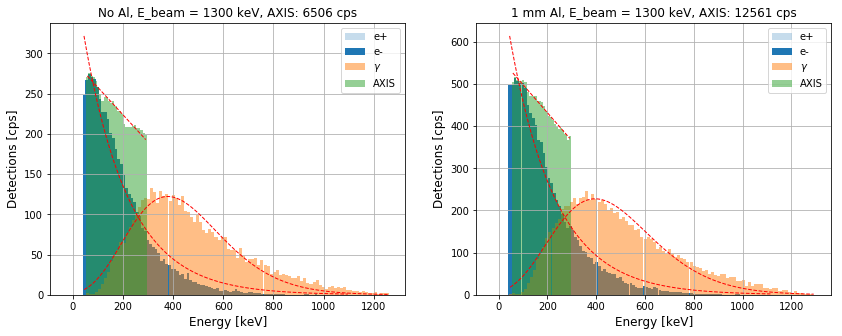

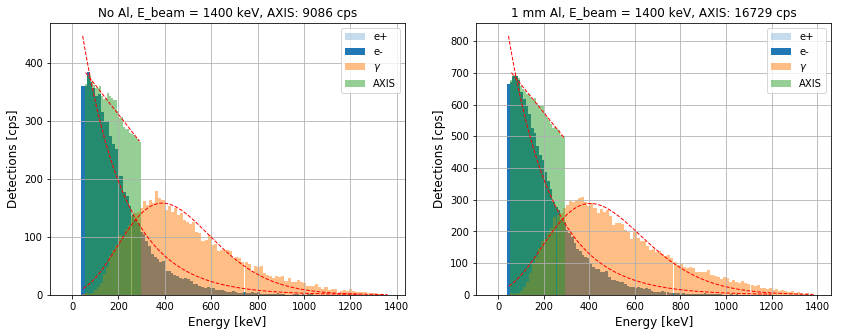

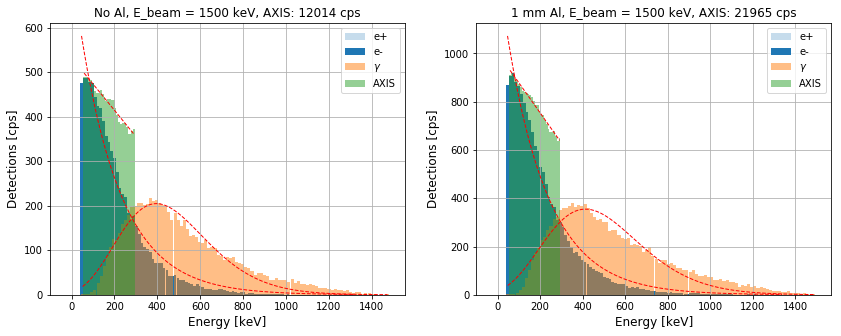

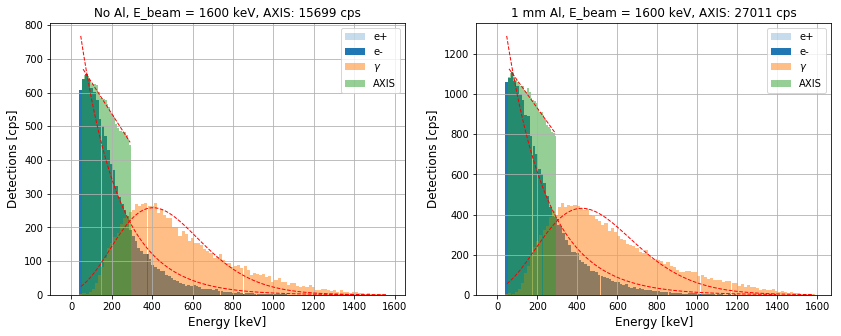

In [7]:
mc_factor = 1e8/6e6;

# Scalar QDE's? Also assuming e- and gamma QDE's the same (?)
photonQDE   = 0.6;
electronQDE = 0.6;

widths = np.diff(bins)
widths = np.insert(widths, len(widths), 67);
b = 100;
for name in GSFC_data_blanca.keys():
    f, [ax3, ax4] = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(14,5));
    
    he1=np.histogram(GSFC_data_blanca[name].E[GSFC_data_blanca[name].p == 'e-'], bins=b);
    hp1=np.histogram(GSFC_data_blanca[name].E[GSFC_data_blanca[name].p == 'gamma'], bins=b);
    ax3.hist(GSFC_data_blanca[name].E[GSFC_data_blanca[name].p == 'e+'], bins=b,
                                                         alpha=0.25, label='e+', density=False);
    
    ye = electronQDE * he1[0]/mc_factor
    xe = he1[1][0:-1] + np.diff(he1[1])/2

    yp = photonQDE * hp1[0]/mc_factor
    xp = hp1[1][0:-1] + np.diff(hp1[1])/2
    
    xa = bins;
    ya_p = np.interp(xa, xp, yp)
    ya_e = np.interp(xa, xe, ye)
    ya = ya_p + ya_e
    ya[~((xa > 50) & (xa < 300))] = 0;
    
    ax3.bar(x=xe, height=ye, width=np.ptp(xe)/b, alpha=1.0, label='e-')
    ax3.bar(x=xp, height=yp, width=np.ptp(xp)/b, alpha=0.5, label=r'$\gamma$')
    ax3.bar(x=xa, height=ya, width=widths, alpha=0.5, label='AXIS')
    ax3.set_title("No Al, E_beam = %s keV, AXIS: %.0f cps" % (name, np.nansum(ya)));


    popt2e1,_ = curve_fit(fit_fnc1, xe, ye, p0=(100,10))
    popt2p1,_ = curve_fit(fit_fnc3, xp, yp, p0=(10,10,100))
    popt2a1,_ = curve_fit(fit_fnc4, xa[ya != 0], ya[ya != 0], p0=(-10,10))
    popt2l1,_ = curve_fit(fit_fnc5, xa[ya != 0], ya[ya != 0], p0=(-10,10,10))

    ax3.plot(xe, fit_fnc1(xe, *popt2e1), 'r--', linewidth=1);
    ax3.plot(xp, fit_fnc3(xp, *popt2p1), 'r--', linewidth=1);
    ax3.plot(xa[ya != 0], fit_fnc4(xa[ya != 0], *popt2a1), 'r--', linewidth=1);
    #ax3.plot(xa[ya != 0], fit_fnc5(xa[ya != 0], *popt2l1), 'r--', linewidth=1);
    
    ax3.set_ylabel('Detections [cps]', fontsize=12)
    ax3.legend(); ax3.grid(); ax3.set_xlabel('Energy [keV]', fontsize=12)
    

    he2=np.histogram(GSFC_data_blanca1mmAl[name].E[GSFC_data_blanca1mmAl[name].p == 'e-'], bins=b) 
    hp2=np.histogram(GSFC_data_blanca1mmAl[name].E[GSFC_data_blanca1mmAl[name].p == 'gamma'], bins=b);
    
    ax4.hist(GSFC_data_blanca1mmAl[name].E[GSFC_data_blanca1mmAl[name].p == 'e+'], bins=b,
                                                         alpha=0.25, label='e+', density=False);

    ye = electronQDE * he2[0]/mc_factor
    xe = he2[1][0:-1] + np.diff(he2[1])/2

    yp = photonQDE * hp2[0]/mc_factor
    xp = hp2[1][0:-1] + np.diff(hp2[1])/2
    
    xa = bins;
    ya_p = np.interp(xa, xp, yp)
    ya_e = np.interp(xa, xe, ye)
    ya = ya_p + ya_e
    ya[~((xa > 50) & (xa < 300))] = 0;
       
    ax4.bar(x=xe, height=ye, width=np.ptp(xe)/b, alpha=1,  label='e-')
    ax4.bar(x=xp, height=yp, width=np.ptp(xp)/b, alpha=0.5,  label=r'$\gamma$')
    ax4.bar(x=xa, height=ya, width=widths, alpha=0.5, label='AXIS')
    ax4.set_title("1 mm Al, E_beam = %s keV, AXIS: %.0f cps" % (name, np.nansum(ya)));
    

    popt2e2,_ = curve_fit(fit_fnc1, xe, ye, p0=(100,10))
    popt2p2,_ = curve_fit(fit_fnc3, xp, yp, p0=(10,10,100))
    popt2a2,_ = curve_fit(fit_fnc4, xa[ya != 0], ya[ya != 0], p0=(-10,10))
    popt2l2,_ = curve_fit(fit_fnc5, xa[ya != 0], ya[ya != 0], p0=(-10,10,10))

    print("E_beam = %s keV , E0_fit = %.2f kev, %.2f keV" % (name, popt2e1[1], popt2e2[1]))
    print("m=%.2f, d=%.2f -- m=%.2f, d=%.2f" % (popt2a2[0], popt2a2[1], popt2a1[0], popt2a1[1]))
    ax4.plot(xe, fit_fnc1(xe, *popt2e2), 'r--', linewidth=1);
    ax4.plot(xp, fit_fnc3(xp, *popt2p2), 'r--', linewidth=1);
    ax4.plot(xa[ya != 0], fit_fnc4(xa[ya != 0], *popt2a2), 'r--', linewidth=1);
    #ax4.plot(xa[ya != 0], fit_fnc5(xa[ya != 0], *popt2l2), 'r--', linewidth=1);

    ax4.legend(); ax4.grid(); ax4.set_xlabel('Energy [keV]', fontsize=12);
    ax4.set_ylabel('Detections [cps]', fontsize=12)


# Goddard REF Test Plan

The nominal test plan is to use beam energies of [800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600] keV in two configurations: hitting the side of the instrument normally such all shielding layers are passed through, and through the beryllium window and coded aperture.

**Experiment parameter space**
- Beam Energy
  - $[800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600]$ keV 
- Beam Intensity
  - Fixed: 10$^{-9}$mA/cm$^2$ for energies within nominal testing
- Beam Width
  - Fixed: 2" 
- Configuration
  - Side: through shielding layers onto side of detectors
  - Front: through window and aperture onto face of detectors
- Exposure Time
  - Variable




In order to estimate $q_e$, the electron QDE, we can write the measurement as the sum of the two detection sources:

**Known coefficients:**  GEANT4: $a, b, c, E_0$,  Redlen: $q_\gamma$

**Measurement:** $m, d, C = q_e N_e + q_\gamma N_\gamma$

**Unknown:** $q_e$

Electron distribution, exponential:
$$f_1 = q_e N_e \cdot e^{-E/E_0}$$

Photon distribution, shifted gamma:
$$f_2 = q_\gamma N_\gamma\cdot \frac{1}{\Gamma(a)b^a} (E+c)^{a-1}e^{-(E+c)/b}$$

Measurement:

$$y = log(f_1 + f_2) = mE + d$$

$$log\left(q_e N_e e^{-E/E_0} + q_\gamma N_\gamma \frac{1}{\Gamma(a)b^a} (E+c)^{a-1}e^{-(E+c)/b} \right) = mE + d$$

$$\hat{q}_e = \frac{1}{N_e}e^{E/E_0}\left(e^{mE+d} - \frac{q_\gamma N_\gamma}{\Gamma(a)b^a}(E+c)^{a-1}e^{-(E+c)/b}\right)$$


/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in power


ValueError: fp and xp are not of the same length.

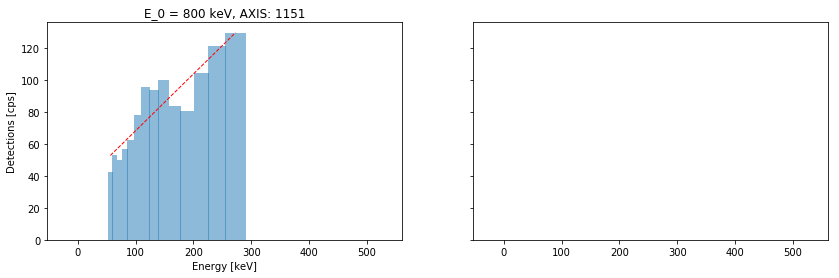

In [8]:

# Scalar QDE's? Also assuming e- and gamma QDE's the same (?)
photonQDE   = 0.6;
electronQDE = 0.7;

NF = 0.2;

qe_est = [];
for name in GSFC_data_blanca.keys():
    f, [ax1, ax2] = plt.subplots(1, 2, figsize=(14, 4), sharey=True, sharex=True)
    he1=np.histogram(GSFC_data_blanca[name].E[GSFC_data_blanca[name].p == 'e-'], bins=bins);
    hp1=np.histogram(GSFC_data_blanca[name].E[GSFC_data_blanca[name].p == 'gamma'], bins=bins);
    
    ye = electronQDE * he1[0]/mc_factor
    xe = he1[1][0:-1] + np.diff(he1[1])/2

    yp = photonQDE * hp1[0]/mc_factor
    xp = hp1[1][0:-1] + np.diff(hp1[1])/2
    
    ye += np.random.randn(ye.size)*NF*ye;
    yp += np.random.randn(yp.size)*NF*yp;
    
    xa = bins;
    ya_p = np.interp(xa, xp, yp)
    ya_e = np.interp(xa, xe, ye)
    ya = ya_p + ya_e
    ya[~((xa > 50) & (xa < 300))] = 0;

    popt2e1,_ = curve_fit(fit_fnc1, xe, ye, p0=(100,10))
    popt2p1,_ = curve_fit(fit_fnc3, xp, yp, p0=(10,10,100))
    popt2a1,_ = curve_fit(fit_fnc4, xa[ya != 0], ya[ya != 0], p0=(-10,10))
    popt2l1,_ = curve_fit(fit_fnc5, xa[ya != 0], ya[ya != 0], p0=(-10,10,10))
 
    ax1.bar(x=xa, height=ya, width=widths, alpha=0.5, label='AXIS')
    ax1.plot(xa[ya != 0], fit_fnc4(xa[ya != 0], *popt2a1), 'r--', linewidth=1);
    ax1.set_title("E_0 = %s keV, AXIS: %.0f" % (name, np.sum(ya)));
    ax1.set_xlabel('Energy [keV]'); ax1.set_ylabel('Detections [cps]');

    
    ya_e = np.interp(xa, xe, he2[0]/mc_factor)
    a  = popt2p2[0];
    b  = popt2p2[1];
    c  = popt2p2[2];
    m  = popt2a2[0];
    d  = popt2a2[1];
    E0 = popt2e2[1];
    E  = bins;
    Cg = np.sum(ya_p[((xa >= 50) & (xa <= 300))]);
    Ne = np.sum(ya_e[((xa >= 50) & (xa <= 300))]);
    
    q1 = photonQDE/1.25 * (np.trapz(x=widths[1:16], y=m*bins[1:16]+d) - Cg) / Ne;
    

    he2=np.histogram(GSFC_data_blanca1mmAl[name].E[GSFC_data_blanca1mmAl[name].p == 'e-'], bins=bins) 
    hp2=np.histogram(GSFC_data_blanca1mmAl[name].E[GSFC_data_blanca1mmAl[name].p == 'gamma'], bins=bins);
    

    ye = electronQDE * he2[0]/mc_factor
    xe = he2[1][0:-1] + np.diff(he2[1])/2

    yp = photonQDE * hp2[0]/mc_factor
    xp = hp2[1][0:-1] + np.diff(hp2[1])/2
    
    ye += np.random.randn(ye.size)*NF*ye;
    yp += np.random.randn(yp.size)*NF*yp;
    
    xa = bins;
    ya_p = np.interp(xa, xp, yp)
    ya_e = np.interp(xa, xe, ye)
    ya = ya_p + ya_e
    ya[~((xa > 50) & (xa < 300))] = 0;
       
    popt2e2,_ = curve_fit(fit_fnc1, xe, ye, p0=(100,10))
    popt2p2,_ = curve_fit(fit_fnc3, xp, yp, p0=(10,10,100))
    popt2a2,_ = curve_fit(fit_fnc4, xa[ya != 0], ya[ya != 0], p0=(-10,10))
    popt2l2,_ = curve_fit(fit_fnc5, xa[ya != 0], ya[ya != 0], p0=(-10,10,10))
    
    ax2.bar(x=xa, height=ya, width=widths, alpha=0.5, label='AXIS')
    ax2.plot(xa[ya != 0], fit_fnc4(xa[ya != 0], *popt2a2), 'r--', linewidth=1);
    ax2.set_title("E_0 = %s keV, AXIS: %.0f" % (name, np.sum(ya)));
    ax2.set_xlabel('Energy [keV]'); ax2.set_ylabel('Detections [cps]');
    
    ya_e = np.interp(xa, xe, he2[0]/mc_factor)
    a  = popt2p2[0];
    b  = popt2p2[1];
    c  = popt2p2[2];
    m  = popt2a2[0];
    d  = popt2a2[1];
    E0 = popt2e2[1];
    Cg = np.sum(ya_p[((xa >= 50) & (xa <= 300))]);
    Ne = np.sum(ya_e[((xa >= 50) & (xa <= 300))]);
    E  = bins;
    
    #q2 = 1/Ne * np.exp(E/E0) * (np.exp(m*E+d) - Cg/(gamma(a) * b**a) * (E+c)**(a-1) * np.exp(-(E+c)/b)) 
    q2 = photonQDE/1.25 * (np.trapz(x=widths[1:16], y=m*bins[1:16]+d) - Cg) / Ne;
    qe_est.append([q1, q2]);
    

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

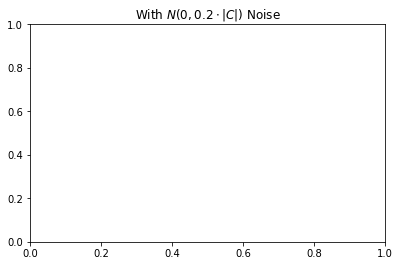

In [9]:
plt.figure(figsize=(14,4)); plt.subplot(1,2,1);
plt.title("With $N(0, 0.2\cdot|C|)$ Noise");
plt.plot(range(800, 1600+100, 100), qe_est, '.-', label='Simulated Data');
plt.xlabel('Beam Energy [keV]', fontsize=14);
plt.ylabel(r'$\hat{q}_e$', fontsize=14);
plt.hlines(electronQDE, 800, 1600, linestyle='--', label=r'True q$_e$');
plt.legend(); plt.grid();
plt.ylim([0.5, 1.05]);
plt.subplot(1,2,2); plt.grid();
plt.plot(range(800, 1600+100, 100), np.subtract(qe_est, electronQDE), '.-');
plt.xlabel('Beam Energy [keV]', fontsize=14);
plt.ylabel(r'$q_e - \hat{q}_e$', fontsize=14);

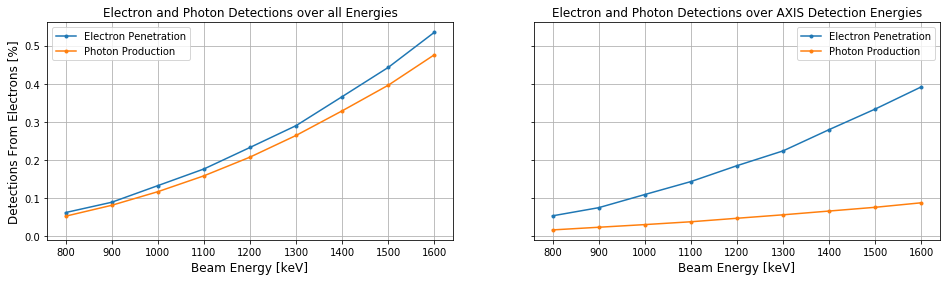

In [10]:
Nparts = 1e8
penFracE = np.zeros([len(GSFC_data_blanca1mmAl), 1])
penFracG = np.zeros([len(GSFC_data_blanca1mmAl), 1])

penFracE_AXIS = np.zeros([len(GSFC_data_blanca1mmAl), 1])
penFracG_AXIS = np.zeros([len(GSFC_data_blanca1mmAl), 1])

for ind, name in enumerate(GSFC_data_blanca1mmAl.keys()):
    penFracE[ind] = len(GSFC_data_blanca1mmAl[name].E[GSFC_data_blanca1mmAl[name].p == 'e-']) / Nparts
    penFracG[ind] = len(GSFC_data_blanca1mmAl[name].E[GSFC_data_blanca1mmAl[name].p == 'gamma']) / Nparts
    
    penFracE_AXIS[ind] = len(GSFC_data_blanca1mmAl[name].E[(GSFC_data_blanca1mmAl[name].p == 'e-') & 
                                                      (GSFC_data_blanca1mmAl[name].E > 50)         &
                                                      (GSFC_data_blanca1mmAl[name].E < 300)]) / Nparts
    penFracG_AXIS[ind] = len(GSFC_data_blanca1mmAl[name].E[(GSFC_data_blanca1mmAl[name].p == 'gamma')  & 
                                                      (GSFC_data_blanca1mmAl[name].E > 50)             &
                                                      (GSFC_data_blanca1mmAl[name].E < 300)]) / Nparts



f, [ax1, ax2] = plt.subplots(1, 2, sharey=True, figsize=(16, 4)); 
ax1.grid();
ax1.plot(Earray, 100*penFracE, '.-', label='Electron Penetration');
ax1.plot(Earray, 100*penFracG, '.-', label='Photon Production');
ax1.set_xlabel('Beam Energy [keV]', fontsize=12); ax1.legend();
ax1.set_ylabel('Detections From Electrons [%]', fontsize=12);
ax1.set_title("Electron and Photon Detections over all Energies");

ax2.grid();
ax2.plot(Earray, 100*penFracE_AXIS, '.-', label='Electron Penetration');
ax2.plot(Earray, 100*penFracG_AXIS, '.-', label='Photon Production');
ax2.set_xlabel('Beam Energy [keV]', fontsize=12); ax2.legend();
ax2.set_title("Electron and Photon Detections over AXIS Detection Energies");

In [11]:
bins = np.logspace(np.log10(50), np.log10(500), 20);
bins = np.insert(bins, 0, 0);            # underflow
#bins = np.insert(bins, len(bins), 1500); # overflow

print("No aluminum")
# no aluminum
penFrac_LR = plotTestSpectra(GSFC_data_LR, bins, 1e8, True);

print("1 mm aluminum")
# 1 mm aluminum
penFrac_1mm = plotTestSpectra(GSFC_data_1mm, bins, 1e6, True);

print("2 mm aluminum")
# 2 mm aluminum
penFrac_2mm = plotTestSpectra(GSFC_data_2mm, bins, 1e6, True);

print("Test 2")
penFrac_test2 = plotTestSpectra(GSFC_data_test2, bins, 1e6, True);

print("Test 2, lower energies")
penFrac_test2_2 = plotTestSpectra(GSFC_data_test2_2, bins, 1e6, True);

print("Test 3, even lower energies, no aluminum")
penFrac_test3 = plotTestSpectra(GSFC_data_lowerE, bins, 1.01e8, True);

No aluminum


NameError: name 'GSFC_data_LR' is not defined

NameError: name 'penFrac_test3' is not defined

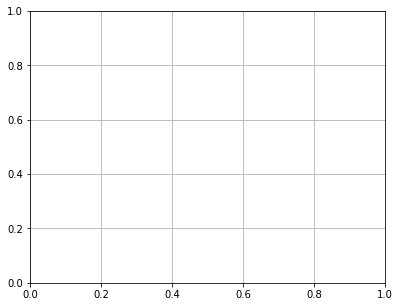

In [12]:
I                 = 6e6; # electrons/cm^2-sec
integrationPeriod = 1;   # sec

def fit_fnc3(x, m, b): # linear fit
    return np.multiply(m, x) + b

energyArray2= [300, 400, 500, 600, 700, 800, 900];         # keV
energyArray = [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700]; # keV

plt.figure(figsize=(14,5)); plt.subplot(1,2,1); plt.grid();
plt.plot(energyArray2, np.multiply(penFrac_test3, 100), '.', 
         energyArray[0:-1], np.multiply(penFrac_LR[0:-1], 100), '.', label='no Al');
plt.plot(energyArray, np.multiply(penFrac_1mm, 100), '.', label='1 mm Al')
plt.plot(energyArray, np.multiply(penFrac_2mm, 100), '.', label='2 mm Al')
plt.xlabel("Beam Energy [keV]", fontsize=12);
plt.ylabel("Beam Flux Penetration [%]", fontsize=12);

popt_lin1, _ = curve_fit(fit_fnc3, energyArray[0:-1], penFrac_LR[0:-1]);
popt_lin2, _ = curve_fit(fit_fnc3, energyArray, penFrac_1mm);
popt_lin3, _ = curve_fit(fit_fnc3, energyArray, penFrac_2mm);
popt_lin4, _ = curve_fit(fit_fnc3, energyArray2, penFrac_test3);

print("no Al: m = %.2e /keV, b = %.2e"   % (popt_lin1[0], popt_lin1[1]))
print("1 mm Al: m = %.2e /keV, b = %.2e" % (popt_lin2[0], popt_lin2[1]))
print("2 mm Al: m = %.2e /keV, b = %.2e" % (popt_lin3[0], popt_lin3[1]))

plt.plot(energyArray[0:-1], 100*fit_fnc3(energyArray[0:-1], *popt_lin1));
plt.plot(energyArray,  100*fit_fnc3(energyArray, *popt_lin2));
plt.plot(energyArray,  100*fit_fnc3(energyArray, *popt_lin3));
plt.plot(energyArray2, 100*fit_fnc3(energyArray2, *popt_lin4));
plt.legend();

plt.subplot(1,2,2); plt.grid();
plt.plot(energyArray, np.multiply(penFrac_1mm, I*integrationPeriod), '.', label='1 mm Al');
plt.plot(energyArray, np.multiply(penFrac_2mm, I*integrationPeriod), '.', label='2 mm Al');
plt.plot(energyArray[0:-1], np.multiply(penFrac_LR[0:-1], I*integrationPeriod), '.', label='no Al');
plt.xlabel("Beam Energy [keV]", fontsize=12);
plt.ylabel("Detector Count Rate [cps]\n(all energy bins)", fontsize=12);
plt.suptitle("AXIS Shielding Response $-$ Test 1",fontsize=14);

plt.hlines(200, min(energyArray), max(energyArray), label='C$_{min}$');
plt.hlines(83000, min(energyArray), max(energyArray), label='C$_{max}$'); plt.legend();

In [13]:
afire_ene = np.concatenate([energyArray2, energyArray[0:-1]])
afire_pen = np.concatenate([penFrac_test3, penFrac_LR[0:-1]])
print(afire_ene)
print(afire_pen)


afire_ene_E0 = [400, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600]
afire_E0 = [359.89, 430.14, 363.01, 277.12, 225.36, 344.49, 356.19, 358.98, 369.75, 373.74, 385.57, 387.88]
plt.figure()
plt.plot(afire_ene_E0, afire_E0, '.');

popt5, _ = curve_fit(fit_fnc3, afire_ene_E0[5:len(afire_E0)], afire_E0[5:len(afire_E0)]); 
plt.plot(afire_ene_E0, fit_fnc3(afire_ene_E0, *popt5), 'r--')
print(afire_ene_E0, fit_fnc3(afire_ene_E0, *popt5))

NameError: name 'penFrac_test3' is not defined

NameError: name 'penFrac_test2' is not defined

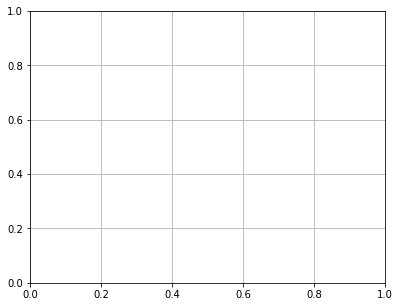

In [14]:
I                 = 6e6; # electrons/cm^2-sec
integrationPeriod = 1;   # sec

# hand-fit coefficients
m2 = 0.008;
b2 = -3.75;

energyArray = [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700]; # keV

plt.figure(figsize=(14,5)); plt.subplot(1,2,1); plt.grid();
plt.plot(energyArray, np.multiply(penFrac_test2, 100), '.', label='no Al');
plt.xlabel("Beam Energy [keV]", fontsize=12);
plt.ylabel("Beam Flux Penetration [%]", fontsize=12);
plt.plot(energyArray, np.multiply(energyArray,m2) + b2, label='Linear Fit');
plt.legend();

plt.subplot(1,2,2); plt.grid();
plt.plot(energyArray, np.multiply(penFrac_test2, I*integrationPeriod), '.', label='1 mm Al');
plt.xlabel("Beam Energy [keV]", fontsize=12);
plt.ylabel("Detector Count Rate [cps]\n(all energy bins)", fontsize=12);
plt.suptitle("AXIS Shielding Response $-$ Test 2",fontsize=14);

plt.hlines(200, min(energyArray), max(energyArray), label='C$_{min}$');
plt.hlines(83000, min(energyArray), max(energyArray), label='C$_{max}$'); plt.legend();

energyArray2 = [200, 250, 300, 350, 400, 450, 500]; # keV

plt.figure(figsize=(14,5)); plt.subplot(1,2,1); plt.grid();
plt.plot(energyArray2, np.multiply(penFrac_test2_2, 100), '.', label='no Al');
plt.xlabel("Beam Energy [keV]", fontsize=12);
plt.ylabel("Beam Flux Penetration [%]", fontsize=12);
plt.plot(energyArray2, np.multiply(energyArray2,m2) + b2, label='Linear Fit');
plt.legend();

plt.subplot(1,2,2); plt.grid();
plt.plot(energyArray2, np.multiply(penFrac_test2_2, I*integrationPeriod), '.', label='1 mm Al');
plt.xlabel("Beam Energy [keV]", fontsize=12);
plt.ylabel("Detector Count Rate [cps]\n(all energy bins)", fontsize=12);
plt.suptitle("AXIS Shielding Response $-$ Test 2",fontsize=14);

plt.hlines(200, min(energyArray2), max(energyArray2), label='C$_{min}$');
plt.hlines(83000, min(energyArray2), max(energyArray2), label='C$_{max}$'); plt.legend();

